In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
dgdrtgr

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

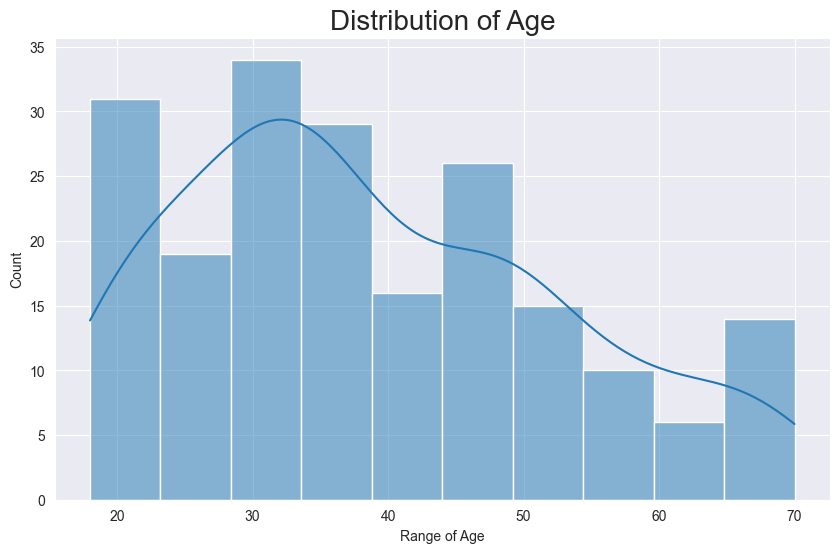

In [8]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.histplot(df['Age'],bins=10,kde=True)
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

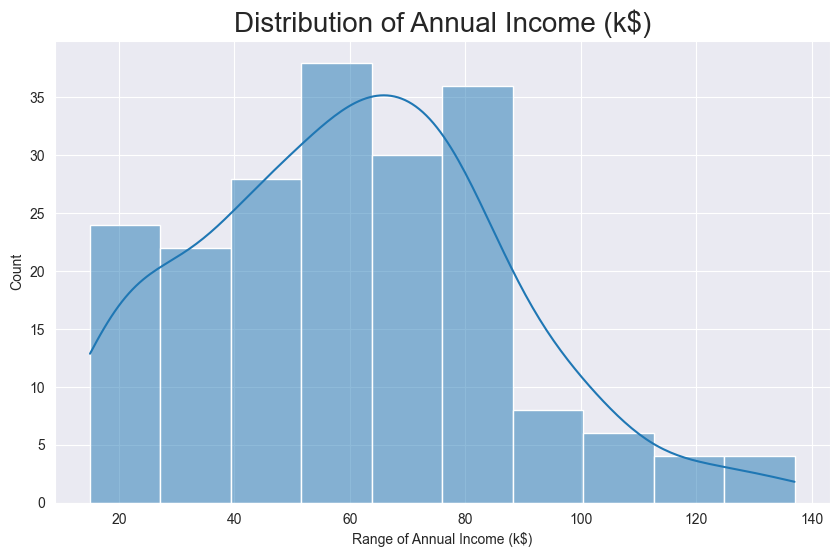

In [9]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.histplot(df['Annual Income (k$)'],bins=10,kde=True)
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

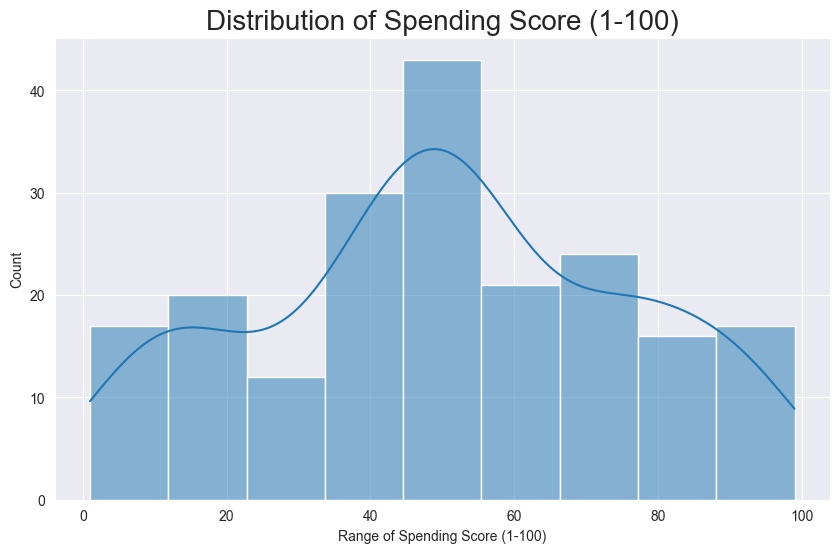

In [10]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.histplot(df['Spending Score (1-100)'],kde=True)
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

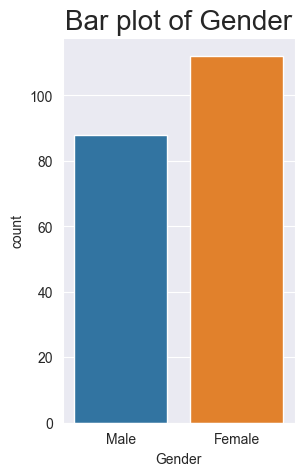

In [11]:
plt.figure(figsize=(3,5))
sns.set_style("darkgrid")
sns.countplot(x='Gender',hue='Gender',data=df)
plt.title('Bar plot of Gender', fontsize = 20)
plt.show()

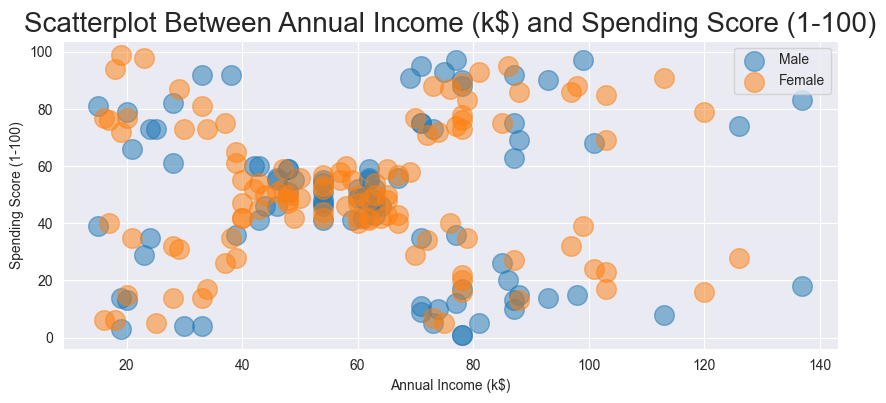

In [12]:
plt.figure(figsize=(10,4))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Scatterplot Between Annual Income (k$) and Spending Score (1-100)', fontsize = 20)
plt.legend()
plt.show()

## **CLUSTERING USING K-Means**

## **1.Segmentation Based on Age and Spending Score**

### **Feature Normalization**

In [13]:
from sklearn.preprocessing import MinMaxScaler

X1 = df.loc[:,['Age','Spending Score (1-100)']].values
scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)

In [14]:
scaler.feature_range

(0, 1)

In [15]:
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X1) 
    wcss.append(kmeans.inertia_)

### **Elbow Curve**

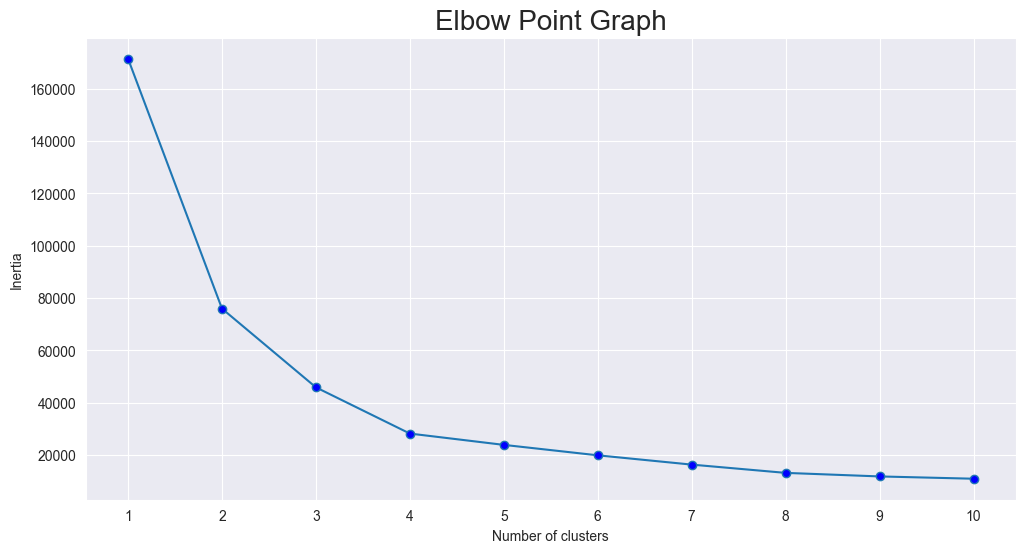

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', markerfacecolor='blue')
plt.title('Elbow Point Graph', fontsize = 20)
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [17]:
kmeans1= KMeans(n_clusters = 5, init = 'k-means++', random_state=42) 
label= kmeans1.fit_predict(X1) #returns a cluster no. for each of the data points
print(label)

[3 1 2 1 3 1 2 4 2 1 2 4 2 1 2 1 3 1 2 4 3 1 2 1 2 4 2 1 2 4 2 1 2 4 2 1 2
 1 2 1 0 4 0 1 2 1 0 3 3 3 0 1 3 0 0 0 0 0 3 0 0 3 0 0 0 1 0 0 1 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 1 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 4 3 1 3 4 2 1 2 1 3 1 2 4 2 1 2 1 2 4 3 4 2 4 0 1
 2 4 2 4 2 1 2 4 2 1 2 1 0 4 2 4 2 1 2 4 2 1 2 1 2 4 2 4 2 1 2 4 3 4 2 4 3
 4 2 1 2 4 2 1 2 4 2 1 2 1 2 4]


In [18]:
print(kmeans1.cluster_centers_)

[[55.9787234  48.5106383 ]
 [28.68421053 71.5       ]
 [43.42553191 14.65957447]
 [28.3        45.575     ]
 [31.28571429 90.39285714]]


### **Visualizing all the clusters** 

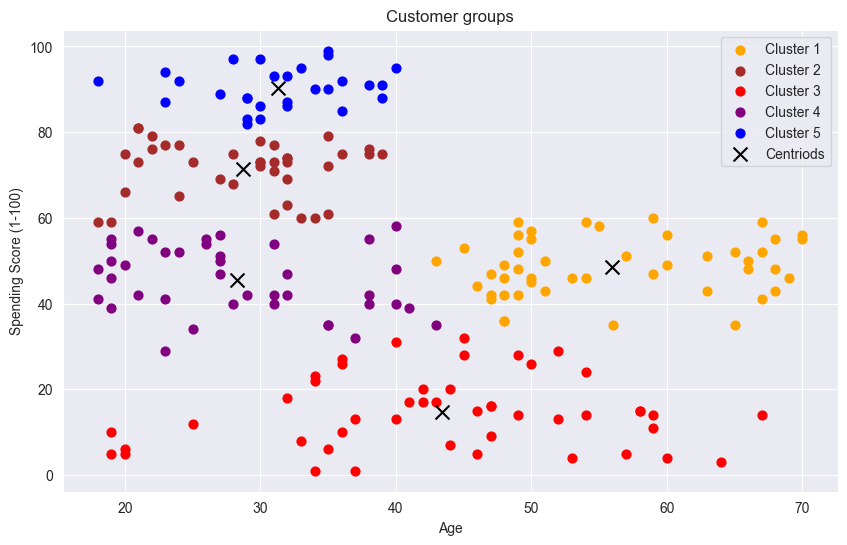

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X1[label == 0,0], X1[label== 0,1], s=40, c='orange', label='Cluster 1')
plt.scatter(X1[label == 1,0], X1[label== 1,1], s=40, c='brown', label='Cluster 2')
plt.scatter(X1[label == 2,0], X1[label== 2,1], s=40, c='red', label='Cluster 3')
plt.scatter(X1[label == 3,0], X1[label== 3,1], s=40, c='purple', label='Cluster 4')
plt.scatter(X1[label == 4,0], X1[label== 4,1], s=40, c='blue', label='Cluster 5')
plt.scatter(kmeans1.cluster_centers_ [:,0], kmeans1.cluster_centers_ [:,1], s= 100, c='black',marker='x', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()  

## **2.Segmentation Based on Annual Income and Spending Score**

### **Feature Normalization**

In [20]:
from sklearn.preprocessing import MinMaxScaler

X = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
scaler.feature_range

(0, 1)

In [22]:
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_)

### **Elbow Curve**

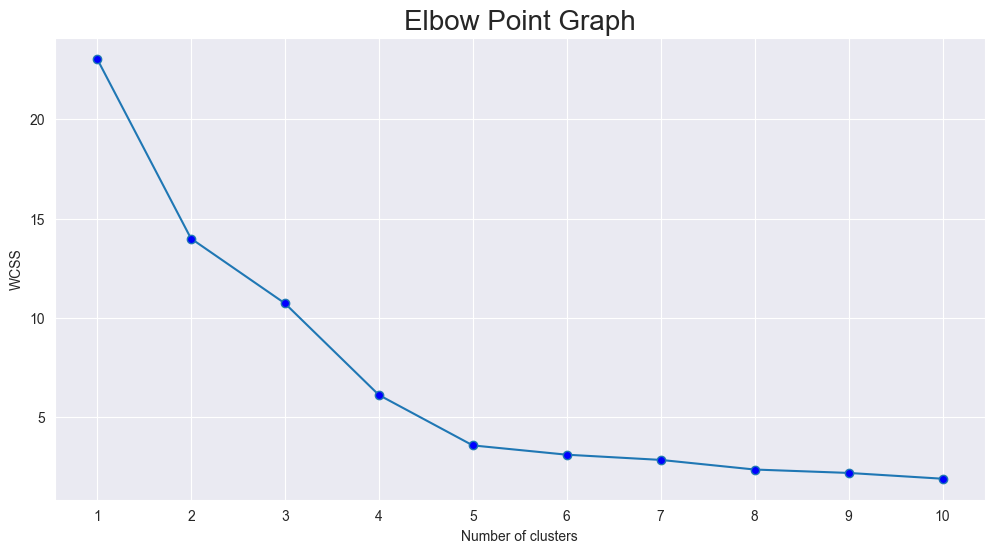

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', markerfacecolor='blue')
plt.title('Elbow Point Graph', fontsize = 20)
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++', random_state=42) 
label= kmeans.fit_predict(X) #returns a cluster no. for each of the data points
print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [25]:
#centroids
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


### **Visualizing all the clusters** 

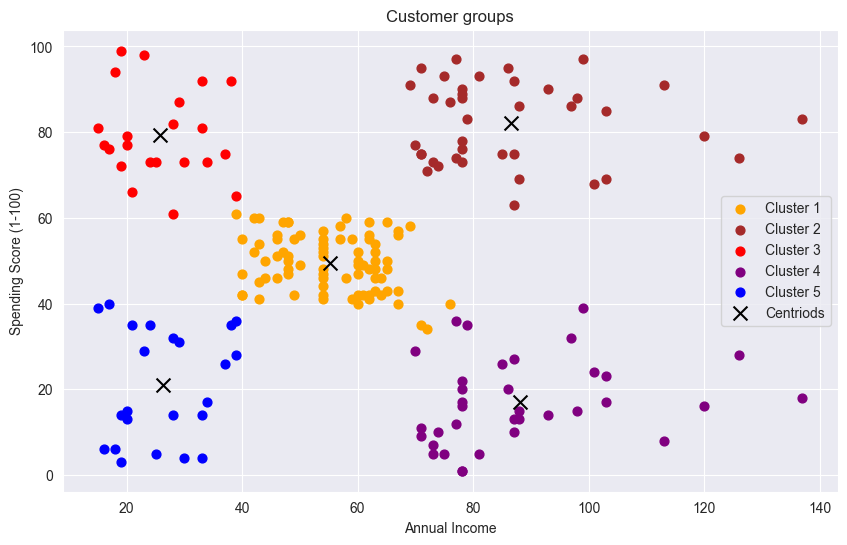

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X[label == 0,0], X[label== 0,1], s=40, c='orange', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=40, c='brown', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=40, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=40, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=40, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black',marker='x', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()  

## **3.Segmentation Based on Age , Annual Income and Spending Score**

### **Feature Normalization**

In [27]:
from sklearn.preprocessing import MinMaxScaler

X2 = df.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']].values
scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)

In [28]:
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_)

### **Elbow Curve**

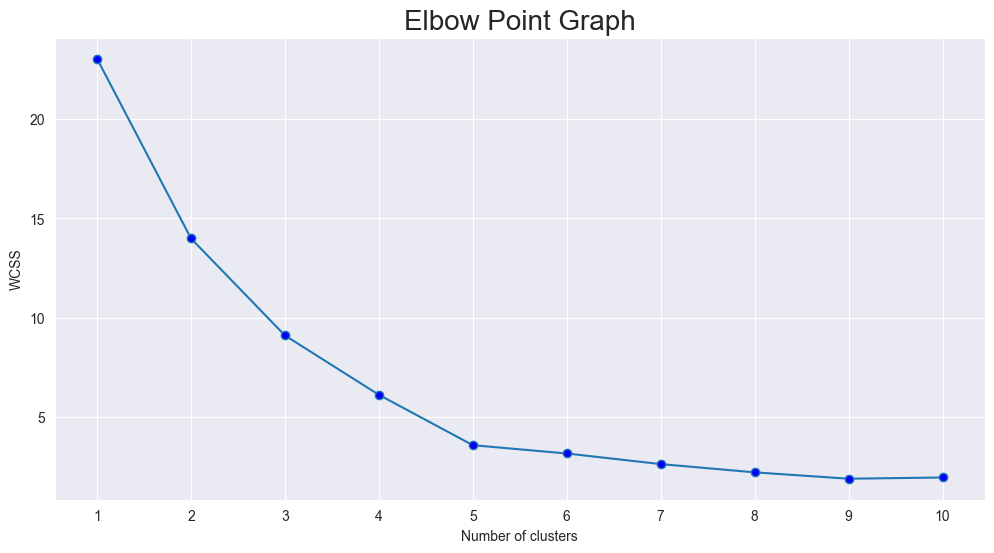

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', markerfacecolor='blue')
plt.title('Elbow Point Graph', fontsize = 20)
plt.xticks(np.arange(1,11,1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++', random_state=42) 
df['label']= kmeans.fit_predict(X2) #returns a cluster no. for each of the data points
print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [31]:
print(kmeans.cluster_centers_)

[[ 46.21348315  47.71910112  41.79775281]
 [ 32.45454545 108.18181818  82.72727273]
 [ 24.68965517  29.5862069   73.65517241]
 [ 40.39473684  87.          18.63157895]
 [ 31.78787879  76.09090909  77.75757576]]


### **Visualizing all the clusters** 

In [32]:
from mpl_toolkits.mplot3d import Axes3D

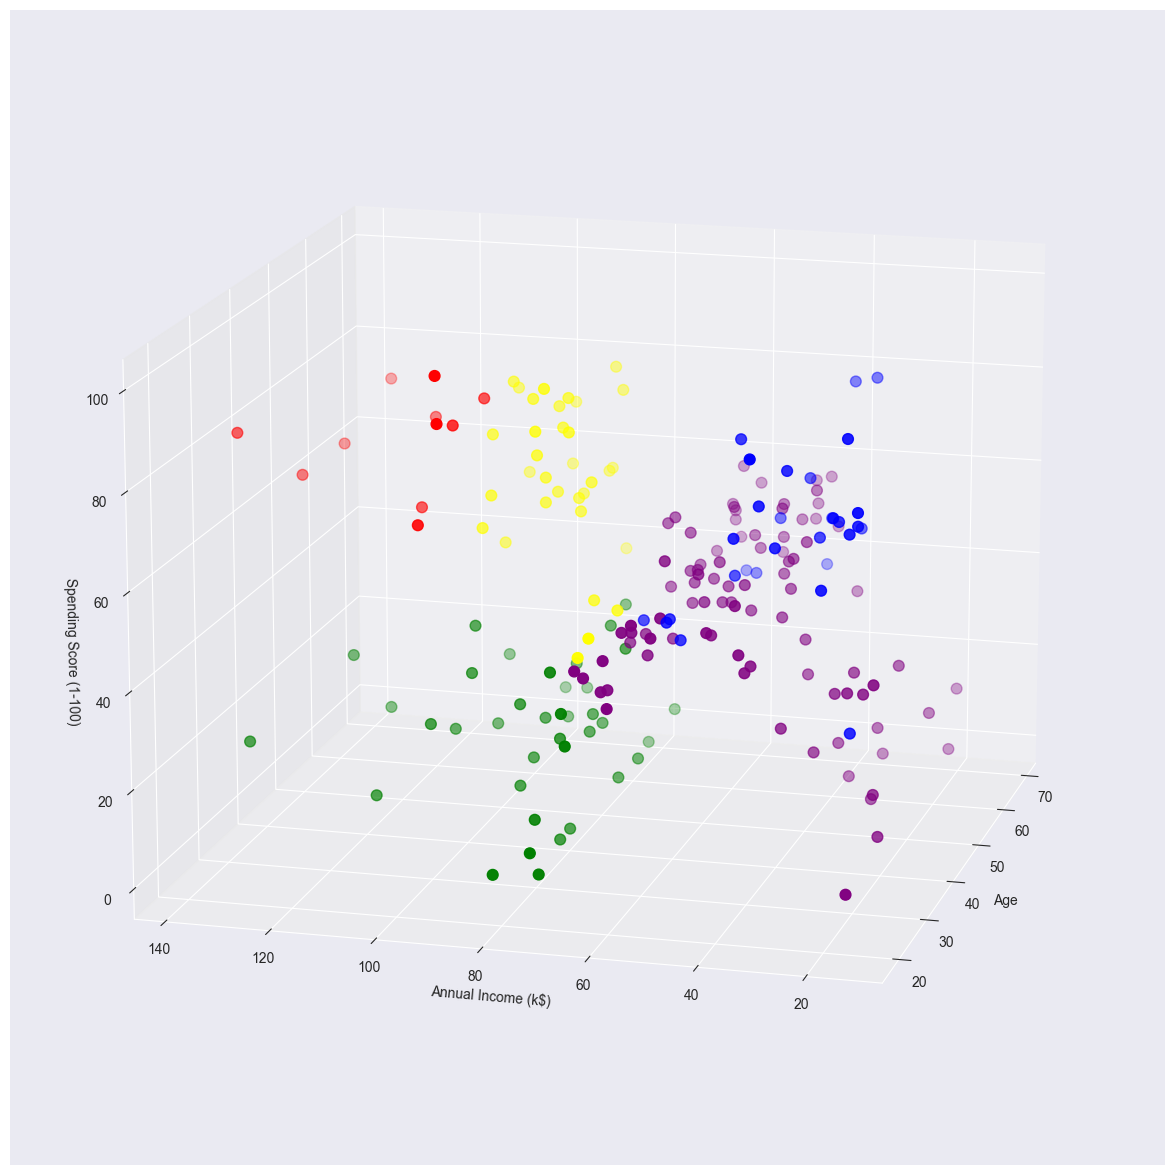

In [33]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='purple', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='blue', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='green', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='yellow', s=60)
ax.view_init(15, 195)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()